In [59]:
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
s21fe = pd.read_csv("dataset/samsung_s21fe-data.csv")
pixel6a = pd.read_csv("dataset/pixel_6a-data.csv")
a70 = pd.read_csv("dataset/samsung_a70-data.csv")
pixel4a = pd.read_csv("dataset/pixel_4a-data.csv")


converting a feature to date time


In [61]:
s21fe["timestamp"] = pd.to_datetime(s21fe["timestamp"])
pixel4a["timestamp"] = pd.to_datetime(s21fe["timestamp"])
pixel6a["timestamp"] = pd.to_datetime(s21fe["timestamp"])
a70["timestamp"] = pd.to_datetime(s21fe["timestamp"])


In [62]:
t1 = s21fe.iloc[0,0]
t2 = a70.iloc[0,0]
t3 = pixel4a.iloc[0,0]
t4 = pixel6a.iloc[0,0]

In [63]:
time1 = []
for index,row in s21fe.iterrows() :
    time1.append(pd.Timedelta(row['timestamp']-t1,unit="minutes"))
s21fe["time_elasped"] = time1

In [64]:
time2 = []
for index,row in a70.iterrows() :
    time2.append(pd.Timedelta(row['timestamp']-t2,unit="minutes"))
a70["time_elasped"] = time2

In [65]:
time3 = []
for index,row in pixel4a.iterrows() :
    time3.append(pd.Timedelta(row['timestamp']-t3,unit="minutes"))
pixel4a["time_elasped"] = time3

In [66]:
time4 = []
for index,row in pixel6a.iterrows() :
    time4.append(pd.Timedelta(row['timestamp']-t4,unit="minutes"))
pixel6a["time_elasped"] = time4

In [67]:
pixel6a.head()

,timestamp,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh),battery_technology,time_elasped
0,2023-04-14 13:05:45.846,3.314,3786,12.547633,1,34.1,170,4410,Li-ion,0 days 00:00:00
1,2023-04-14 13:05:47.004,3.647,3979,14.512781,1,34.1,172,4410,Li-ion,0 days 00:00:01.158000
2,2023-04-14 13:05:48.050,3.647,3987,14.543550,1,34.1,174,4410,Li-ion,0 days 00:00:02.204000
3,2023-04-14 13:05:49.085,3.647,3980,14.517339,1,34.1,174,4410,Li-ion,0 days 00:00:03.239000
4,2023-04-14 13:05:50.110,3.647,3983,14.527595,1,34.1,176,4410,Li-ion,0 days 00:00:04.264000


Full battery data count


In [68]:
s21fe.loc[s21fe["battery_percent"] == 100].shape


(143, 10)

In [69]:
pixel6a.loc[pixel6a["battery_percent"] == 100].shape


(303, 10)

In [70]:
a70.loc[a70["battery_percent"] == 100].shape


(7, 10)

In [71]:
pixel4a.loc[pixel4a["battery_percent"] == 100].shape


(97, 10)

S21 FE Time vs Current Graph


Text(0, 0.5, 'Current (mA)')

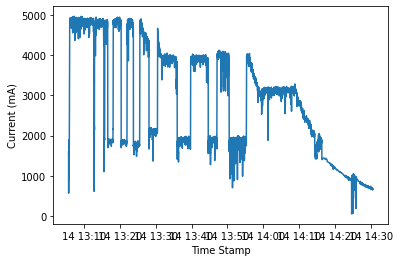

In [72]:
x = s21fe["timestamp"]
y = s21fe["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Current (mA)")


S21 FE Time vs Voltage Graph


Text(0, 0.5, 'Voltage(V)')

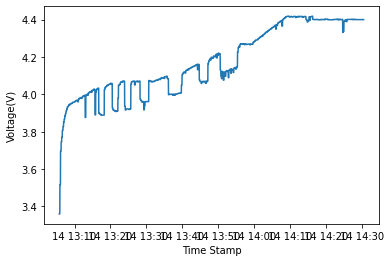

In [73]:
x = s21fe["timestamp"]
y = s21fe["voltage(V)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Voltage(V)")


S21 FE Time vs Power Graph


Text(0, 0.5, 'Power(W)')

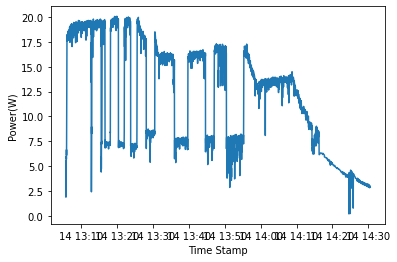

In [74]:
x = s21fe["timestamp"]
y = s21fe["power(W)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Power(W)")


S21 FE Time vs Temperature Graph


Text(0, 0.5, 'temperature(Celsius)')

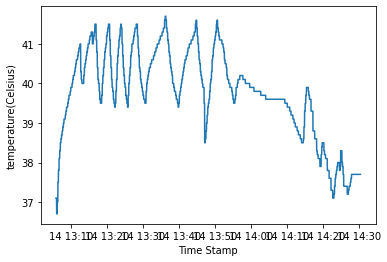

In [75]:
x = s21fe["timestamp"]
y = s21fe["battery_temperature(Celsius)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("temperature(Celsius)")


S21 FE Time vs SOC Graph


Text(0, 0.5, 'Battery level')

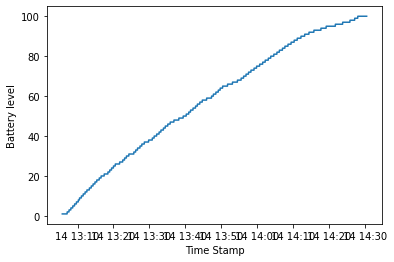

In [76]:
x = s21fe["timestamp"]
y = s21fe["battery_percent"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Battery level")


Samsung A70 Time vs Current Graph


Text(0, 0.5, 'Current (mA)')

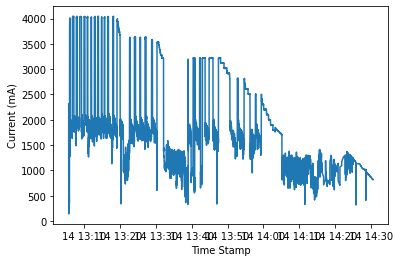

In [77]:
x = a70["timestamp"]
y = a70["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Current (mA)")


Pixel 6A Time vs Current Graph


Text(0, 0.5, 'Current (mA)')

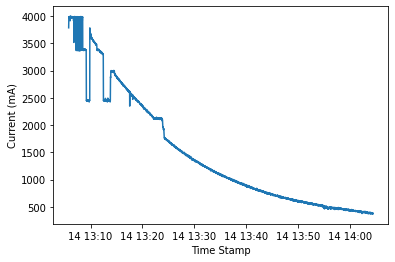

In [78]:
x = pixel6a["timestamp"]
y = pixel6a["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Current (mA)")


Shape of all four phones


In [79]:
pixel6a.shape


(3332, 10)

In [80]:
a70.shape


(4686, 10)

In [81]:
s21fe.shape


(4464, 10)

In [82]:
pixel4a.shape


(2889, 10)

Max temp the phone reached while charging


In [83]:
print("A70 Max Temp", a70["battery_temperature(Celsius)"].max())
print("S21FE Max Temp", s21fe["battery_temperature(Celsius)"].max())
print("Pixel 6A Max Temp", pixel6a["battery_temperature(Celsius)"].max())
print("Pixel 4A Max Temp", pixel4a["battery_temperature(Celsius)"].max())


A70 Max Temp 40.1
S21FE Max Temp 41.7
Pixel 6A Max Temp 42.7
Pixel 4A Max Temp 41.4


Correlation


In [84]:
pixel6a.corr()


,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.868765,-0.841552,0.961953,-0.725914,0.964408,NaN
current(mA),-0.868765,1.000000,0.998412,-0.943624,0.925130,-0.939750,NaN
power(W),-0.841552,0.998412,1.000000,-0.925999,0.938359,-0.921439,NaN
battery_percent,0.961953,-0.943624,-0.925999,1.000000,-0.817088,0.999553,NaN
battery_temperature(Celsius),-0.725914,0.925130,0.938359,-0.817088,1.000000,-0.812513,NaN
remaining_battery_charge(mAh),0.964408,-0.939750,-0.921439,0.999553,-0.812513,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
a70.corr()


,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,0.088772,0.143112,0.796245,0.622724,0.794243,NaN
current(mA),0.088772,1.000000,0.998250,-0.492034,0.179417,-0.497655,NaN
power(W),0.143112,0.998250,1.000000,-0.442711,0.222917,-0.448636,NaN
battery_percent,0.796245,-0.492034,-0.442711,1.000000,0.547542,0.999432,NaN
battery_temperature(Celsius),0.622724,0.179417,0.222917,0.547542,1.000000,0.532167,NaN
remaining_battery_charge(mAh),0.794243,-0.497655,-0.448636,0.999432,0.532167,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
s21fe.corr()


,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.387511,-0.311557,0.926127,-0.432842,0.926291,NaN
current(mA),-0.387511,1.000000,0.995779,-0.635516,0.411069,-0.636134,NaN
power(W),-0.311557,0.995779,1.000000,-0.569778,0.407685,-0.570358,NaN
battery_percent,0.926127,-0.635516,-0.569778,1.000000,-0.467203,0.999941,NaN
battery_temperature(Celsius),-0.432842,0.411069,0.407685,-0.467203,1.000000,-0.465893,NaN
remaining_battery_charge(mAh),0.926291,-0.636134,-0.570358,0.999941,-0.465893,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
pixel4a.corr()


,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.734010,-0.681379,0.954687,-0.485023,0.959233,NaN
current(mA),-0.734010,1.000000,0.996327,-0.849624,0.640539,-0.852406,NaN
power(W),-0.681379,0.996327,1.000000,-0.803863,0.668082,-0.807449,NaN
battery_percent,0.954687,-0.849624,-0.803863,1.000000,-0.447011,0.999495,NaN
battery_temperature(Celsius),-0.485023,0.640539,0.668082,-0.447011,1.000000,-0.467295,NaN
remaining_battery_charge(mAh),0.959233,-0.852406,-0.807449,0.999495,-0.467295,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN
